In [1]:
# Importando os pacotes a serem utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exibe todas as colunas
pd.set_option('display.max_columns', None)

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Carregar os dados
df = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\Codigos Python\Base de dados\registro_cobranca_inadimplentes.xlsx")

In [15]:
df.head()

,CODIGO_CLIENTE,NUMERO_CONTRATO,DATA_VENCIMENTO,DIA_VENCIMENTO,PARCELA_ATRASO,VL_ATRASO,EMPRESA_COBRANCA,DATA_PAGAMENTO,DIA_PAGAMENTO,VL_PAGAMENTO,VL_HONORARIOS_COBRANCA
0,8270,858591,2025-06-09,9,20,893.58,COBRADORA ABC LTDA,2025-06-16,16,893.58,116.17
1,1860,553407,2025-06-08,8,16,983.25,COBRADORA ABC LTDA,2025-06-16,16,983.25,127.82
2,6390,873746,2025-06-09,9,15,1290.22,COBRADORA ABC LTDA,2025-06-15,15,1290.22,167.73
3,6191,853658,2025-06-08,8,14,977.28,COBRADORA ABC LTDA,2025-06-18,18,977.28,127.05
4,6734,571849,2025-06-09,9,12,1283.28,COBRADORA ABC LTDA,2025-06-18,18,1283.28,166.83


In [16]:
df.shape

(5000, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CODIGO_CLIENTE          5000 non-null   int64         
 1   NUMERO_CONTRATO         5000 non-null   int64         
 2   DATA_VENCIMENTO         5000 non-null   datetime64[ns]
 3   DIA_VENCIMENTO          5000 non-null   int64         
 4   PARCELA_ATRASO          5000 non-null   int64         
 5   VL_ATRASO               5000 non-null   float64       
 6   EMPRESA_COBRANCA        5000 non-null   object        
 7   DATA_PAGAMENTO          5000 non-null   datetime64[ns]
 8   DIA_PAGAMENTO           5000 non-null   int64         
 9   VL_PAGAMENTO            5000 non-null   float64       
 10  VL_HONORARIOS_COBRANCA  5000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(5), object(1)
memory usage: 429.8+ KB


In [18]:
df.isnull().sum()

CODIGO_CLIENTE            0
NUMERO_CONTRATO           0
DATA_VENCIMENTO           0
DIA_VENCIMENTO            0
PARCELA_ATRASO            0
VL_ATRASO                 0
EMPRESA_COBRANCA          0
DATA_PAGAMENTO            0
DIA_PAGAMENTO             0
VL_PAGAMENTO              0
VL_HONORARIOS_COBRANCA    0
dtype: int64

In [20]:
# Verificar quais as empresas de cobrança
df['EMPRESA_COBRANCA'].value_counts()

EMPRESA_COBRANCA
COBRADORA ABC LTDA    5000
Name: count, dtype: int64

In [21]:
# Verificar quais os dias de inadimplência
df ['DATA_VENCIMENTO'].value_counts()

DATA_VENCIMENTO
2025-06-06    901
2025-06-05    876
2025-06-09    831
2025-06-10    807
2025-06-07    793
2025-06-08    792
Name: count, dtype: int64

In [22]:
# Verificar quais os dias de pagamento
df ['DATA_PAGAMENTO'].value_counts()

DATA_PAGAMENTO
2025-06-18    1283
2025-06-15    1267
2025-06-17    1247
2025-06-16    1203
Name: count, dtype: int64

In [24]:
# Média de atraso por Vencimento
df.groupby('DIA_VENCIMENTO')['VL_ATRASO'].mean()

DIA_VENCIMENTO
5     1005.441313
6      997.330877
7     1006.755624
8      988.134773
9     1004.935824
10     981.246444
Name: VL_ATRASO, dtype: float64

In [25]:
# Total de Atraso por Vencimento
df.groupby('DIA_VENCIMENTO')['VL_ATRASO'].sum() 

DIA_VENCIMENTO
5     880766.59
6     898595.12
7     798357.21
8     782602.74
9     835101.67
10    791865.88
Name: VL_ATRASO, dtype: float64

In [26]:
# Media de pagamento por dia de pagamento
df.groupby('DIA_PAGAMENTO')['VL_ATRASO'].mean()

DIA_PAGAMENTO
15     989.856559
16     995.349751
17    1001.293256
18    1003.213180
Name: VL_ATRASO, dtype: float64

In [27]:
# Total de Pagamento por dia de pagamento
df.groupby('DIA_PAGAMENTO')['VL_ATRASO'].sum()

DIA_PAGAMENTO
15    1254148.26
16    1197405.75
17    1248612.69
18    1287122.51
Name: VL_ATRASO, dtype: float64

In [28]:
# total de honorarios por dia de pagamento
df.groupby('DIA_PAGAMENTO')['VL_HONORARIOS_COBRANCA'].sum()

DIA_PAGAMENTO
15    163039.48
16    155662.67
17    162319.59
18    167326.09
Name: VL_HONORARIOS_COBRANCA, dtype: float64

In [29]:
# Criar uma coluna para inserir a quantidade de dias em atraso
df['DIAS_ATRASO'] = (df['DATA_PAGAMENTO'] - df['DATA_VENCIMENTO']).dt.days
df.head()

,CODIGO_CLIENTE,NUMERO_CONTRATO,DATA_VENCIMENTO,DIA_VENCIMENTO,PARCELA_ATRASO,VL_ATRASO,EMPRESA_COBRANCA,DATA_PAGAMENTO,DIA_PAGAMENTO,VL_PAGAMENTO,VL_HONORARIOS_COBRANCA,DIAS_ATRASO
0,8270,858591,2025-06-09,9,20,893.58,COBRADORA ABC LTDA,2025-06-16,16,893.58,116.17,7
1,1860,553407,2025-06-08,8,16,983.25,COBRADORA ABC LTDA,2025-06-16,16,983.25,127.82,8
2,6390,873746,2025-06-09,9,15,1290.22,COBRADORA ABC LTDA,2025-06-15,15,1290.22,167.73,6
3,6191,853658,2025-06-08,8,14,977.28,COBRADORA ABC LTDA,2025-06-18,18,977.28,127.05,10
4,6734,571849,2025-06-09,9,12,1283.28,COBRADORA ABC LTDA,2025-06-18,18,1283.28,166.83,9


In [32]:
# Verificar a média e a mediana dos dias em atraso
print('Média de dias em atraso:', df['DIAS_ATRASO'].mean())
print('Mediana de dias em atraso:', df['DIAS_ATRASO'].median())

Média de dias em atraso: 9.0648
Mediana de dias em atraso: 9.0


In [35]:
# Verificar o total de despesas com honorarios
print ('Total de Honorarios:', df["VL_HONORARIOS_COBRANCA"].sum())

Total de Honorarios: 648347.8300000001


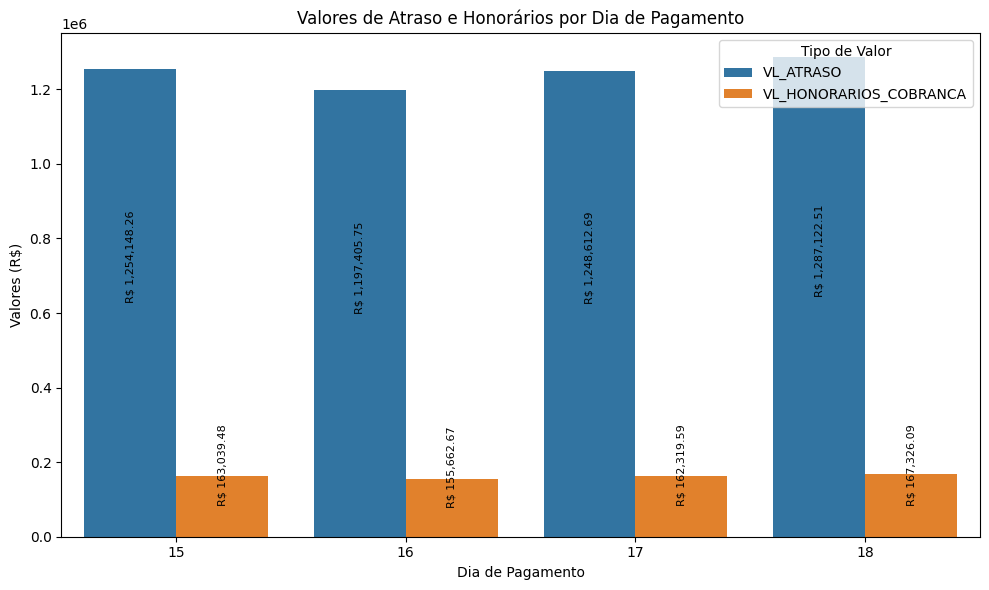

In [36]:
# Gerando gráfico para observar melhor os dados


df_grafico = df.groupby("DIA_PAGAMENTO")[["VL_ATRASO", "VL_HONORARIOS_COBRANCA"]].sum().reset_index()

# Transformar para formato "long" para uso com seaborn
grafico_long = df_grafico.melt(id_vars="DIA_PAGAMENTO",
                                      value_vars=["VL_ATRASO", "VL_HONORARIOS_COBRANCA"],
                                      var_name="Tipo", value_name="Valor")

# Criar gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grafico_long, x="DIA_PAGAMENTO", y="Valor", hue="Tipo")

# Adicionar rótulos com os valores reais corretos por barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height * 0.5, f'R$ {height:,.2f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Ajustes visuais
plt.title("Valores de Atraso e Honorários por Dia de Pagamento")
plt.xlabel("Dia de Pagamento")
plt.ylabel("Valores (R$)")
plt.legend(title="Tipo de Valor")
plt.tight_layout()
plt.show()

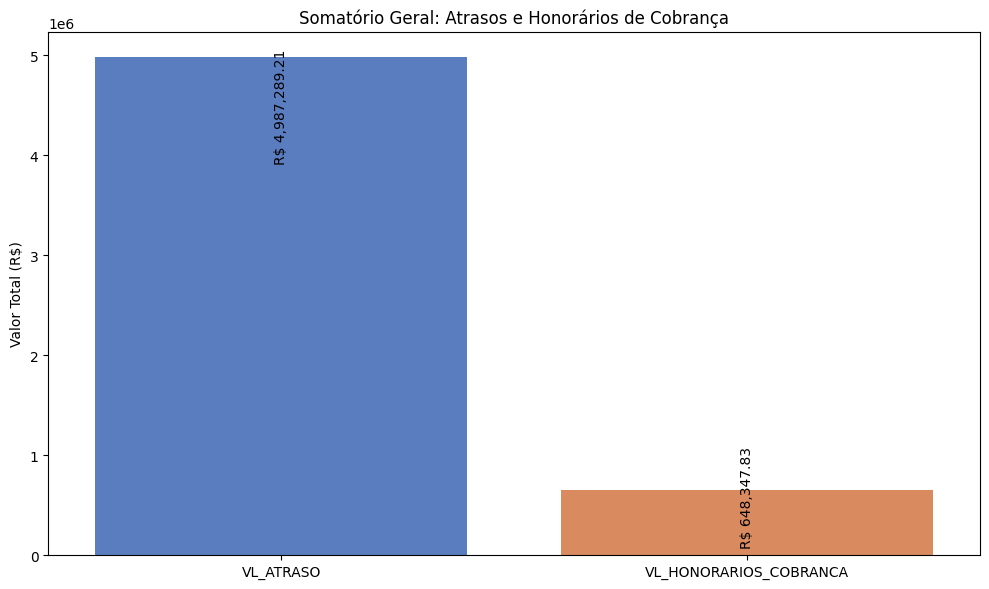

In [37]:
# Calcular os totais
valores_totais = {
    "Tipo": ["VL_ATRASO", "VL_HONORARIOS_COBRANCA"],
    "Valor": [
        df["VL_ATRASO"].sum(),
        df["VL_HONORARIOS_COBRANCA"].sum()
    ]
}

# Criar DataFrame para o gráfico
df_totais = pd.DataFrame(valores_totais)

# Plotar gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_totais, x="Tipo", y="Valor", palette="muted", hue = 'Tipo')

# Adicionar rótulos centralizados
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height * 0.9, f'R$ {height:,.2f}', ha='center', va='center', rotation=90, fontsize=10)

# Ajustes visuais
plt.title("Somatório Geral: Atrasos e Honorários de Cobrança")
plt.xlabel("")
plt.ylabel("Valor Total (R$)")
plt.tight_layout()
plt.show()